
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [6]:
import pandas as pd

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
medical_df = pd.read_csv("drive/MyDrive/ML Course/medical-charges.csv")

In [9]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Прогнозування колонки charges**

1. Розбити дані на підгрупи за катaгорією: `age`, `sex`, `bmi`, `children`, `smoker`, `region`  і обчислити середні `charges` у кожній групі. Наприклад, середні витрати для курців проти некурців, або для чоловіків і жінок. ТАким чином можна побачити які групи мають вищі або нижчі витрати і від цього будувати правило, наприклад, що курці витрачають більше у х-разів ніж некурці.

2. Можна перевірити, наскільки змінні `age`, `sex`, `bmi`, `children`, `smoker`, `region` корелюють з `charges`. Наприклад за допомогою будування діаграми розсіювання. Це допоможе виявити які категорії мають найсильніший вплив на суму `charges`.

3. Можна спробувати побудувати набір правил на основі логіки та експертних припущень. Наприклад:
- Курці -> витрати високі
- Молоді люди без дітей -> низькі витрати
- Високий BMI -> підвищені витрати через можливі хвороби.


**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [10]:
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [11]:
fig = px.histogram(
    medical_df,
    x="charges",
    marginal="box",
    color="sex",
    facet_col="region",
    title="Annual Medical Charges",
    labels={"charges": "Charges", "sex": "Іуч"},
    opacity=0.7
)

fig.update_layout(bargap=0.1)
fig.show()

**Спостереження**

- У всіх регіонах спостерігається асиметричний правосторонній розподіл
- У всіх регіонах, окрім southeast, видно що чоловіки частіше мають вищі витрати (цікаво було б дослідити чому цей регіон вибився)
- У кожному регіоні є прошарок людей кі мають доволі високі charges, можливо це повʼязано з захворюваннями (можливо категорія bmi може відігравати свою роль) та ча є клієнт курцем чі ні.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [12]:
px.histogram(medical_df, x='region', color='smoker', title='Smoker')

**Спостереження**

- У всіх регіонах кількість некурців значно переважає кількість курців.

- Регіони Southwest, Northwest та Northeast мають приблизно однакову кількість записів.

- Хоча частка курців в різних регіонах трохи варіюється, сильних перекосів немає. Це може свідчити, що регіон не є домінантним фактором у звичці палити.

**Виснвовк**

Регіон хоч і пов’язаний з кількістю курців, не демонструє суттєвих аномалій - отже, не є ключовим фактором сам по собі.


In [13]:
px.histogram(medical_df, x='children', color='smoker', title='Smoker')

**Спостереження**

- Найбільше людей у вибірці ті, хто не мають дітей.

- Курці присутні у всіх категоріях дітей, але проглядається тенденція що з ростом кількості дітей зменшується кількість курців.

**Висновок**

Кількість дітей показує тенденцію до зменшення куріння серед людей з більшою кількістю дітей == більшою відповідальністю. Можливо, тут є поведінковий або соціально-економічний зв’язок.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [14]:
fig = px.violin(medical_df,
                   x='charges',
                   color='children',
                   box=True,
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження**

- Кількість дітей не має сильного впливу на середній рівень витрат. Для всіх категорій розподіл витрат схожий. Це може свідчити про те, що інші фактори (наприклад, `age`, `bmi`, `smoker`) мають сильніший вплив.

- У всіх категоріях видно довгі “хвости” праворуч, тобто деякі клієнти мають дуже високі витрати (до 60–70k) — ймовірно, випадки серйозних захворювань.

**Висновок**

- Кількість дітей не є визначальним фактором медичних витрат клієнта - розподіли подібні.

- Інші чинники, ймовірно, відіграють більшу роль

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [15]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [16]:
def estimate_charges(age, w, b):
    return w * age + b

In [17]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

##Варіант 1

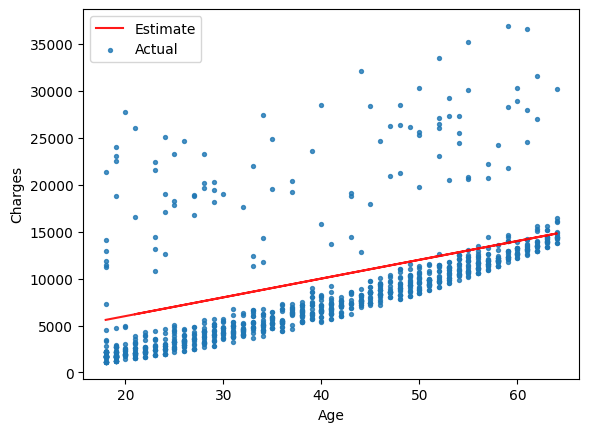

In [18]:
try_parameters(non_smoker_df, w=200, b=2000)

**Спостереження**

- Лінія Estimate має дуже пологий нахил.

- Лінія не проходить через центр масивних хмарок точок.

- Погано враховує загальну тенденцію зростання витрат із віком.

## Варіант 2

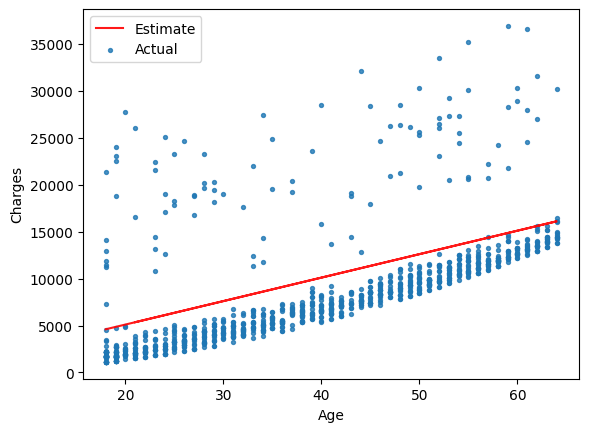

In [19]:
try_parameters(non_smoker_df, w=250, b=100)

**Спостереження**

- Лінія має крутіший нахил, краще відповідає тренду даних.

- Не переоцінює молодших і не надто відстає у старших.

- Це, скоріш за все, найкраще вручну підібране наближення, але той факт що лінія проходить по верхньому "кордону" основного скупчення, мене трохи бентежить.

## Варіант 3

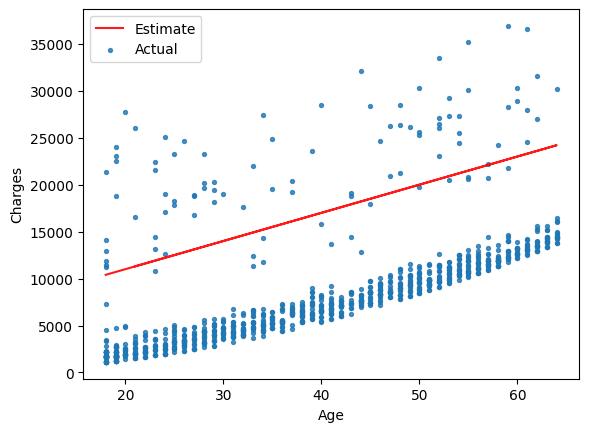

In [20]:
try_parameters(non_smoker_df, w=300, b=5000)

- Початок лінії вже доволі високий, хоча кут здається непоганим.

- Явно переоцінює витрати.


**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [21]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [22]:
targets = non_smoker_df['charges']
predicted_v1 = estimate_charges(non_smoker_df.age, 200, 2000)
predicted_v2 = estimate_charges(non_smoker_df.age, 250, 100)
predicted_v3 = estimate_charges(non_smoker_df.age, 300, 5000)

print(f"RMSE для w=200, b=2000: {rmse(targets, predicted_v1)}")
print(f"RMSE для w=250, b=100: {rmse(targets, predicted_v2)}")
print(f"RMSE для w=300, b=5000: {rmse(targets, predicted_v3)}")

RMSE для w=200, b=2000: 4971.5967339993995
RMSE для w=250, b=100: 4907.571788102452
RMSE для w=300, b=5000: 9601.992249808254


**Висновки**

Найменше значення RMSE при w = 200 і b = 100. Отже, ця модель найкраще наближає фактичні значення.

Щодо загальної стратегії для знаходження кращих значень 𝑤 та 𝑏 методом проб та помилок, я це бачу так:

1. Фіксувати один параметр (наприклад, b) і змінювати інший (w) в розумному діапазоні.

2. Потім можна спробувати навпаки знайти найкращий w і зафіксувати його і таким чином підібрати b.

3. Можливо буде сенс повторити з меншою кроковою зміною (наприклад, спочатку крок 100, потім крок 50, крок 10, крок 1 (можливо це вже перегиб?)).

Вирішила подивитися якщо автоматизувати цей перебір де будемо орієнтуватися на мінімальний `rmse`.

In [30]:
min_rmse = float('inf')
best_w, best_b = 0, 0
ages = non_smoker_df.age
actual_charges = non_smoker_df['charges']

for w in range(-10000, 10001, 50):
    for b in range(-10000, 10001, 50):
        y_pred = estimate_charges(ages, w, b)
        current_rmse = rmse(actual_charges, y_pred)
        if current_rmse < min_rmse:
            min_rmse = current_rmse
            best_w, best_b = w, b

print(f"Найкращі параметри: w={best_w}, b={best_b} з RMSE={min_rmse:.2f}")


Найкращі параметри: w=250, b=-1400 з RMSE=4668.84


Цей результат отримала при ренжі від 0 до 5001 для двох коефіцієнтів.

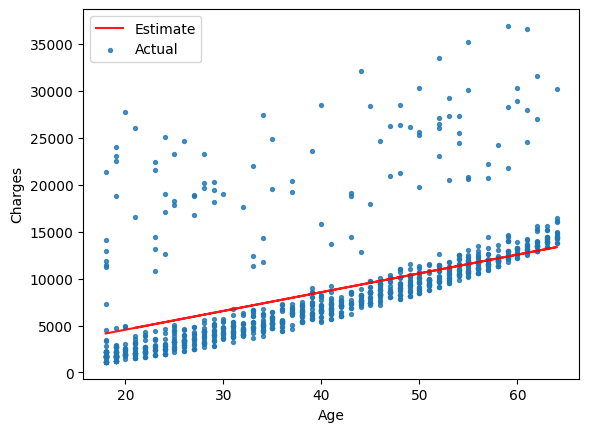

In [27]:
try_parameters(non_smoker_df, w=200, b=550)

Цей вже при ренжі від -10000 до 10001 для двох коефіцієнтів.

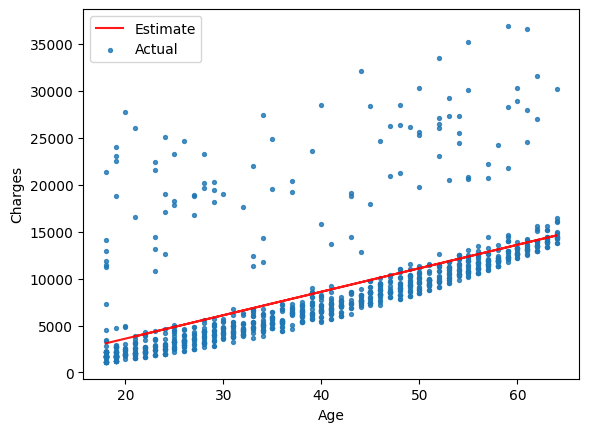

In [31]:
try_parameters(non_smoker_df, w=250, b=-1400)

І от мені трохи не зрозуміло, чи ми такий варіант мали знайти? Кут наче ок, але наче ці коефіціенти не дуже враховують тих хто знаходится за цією міцною сукупністю точок. І як визначати який рендж брати, бо RMS не дуже змінювався чи то я перебирала тільки додатні значення, чи обрала умовну точку в -10000?